In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
data = pd.read_csv('D:/Machine Learning/survey.csv',sep=',',header = 'infer')

In [143]:
data.head(10)

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender_2,Gender_3
0,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,4,6-25,No,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1,0
1,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,3,More than 1000,No,...,No,No,No,No,No,Don't know,No,NaN,0,0
2,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,3,6-25,No,...,No,Yes,Yes,Yes,Yes,No,No,NaN,0,0
3,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,4,26-100,No,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,0,0
4,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,2,100-500,Yes,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0,0
5,2014-08-27 11:31:22,33,United States,TN,NaN,Yes,No,1,6-25,No,...,No,Yes,Yes,No,Maybe,Don't know,No,NaN,0,0
6,2014-08-27 11:31:50,35,United States,MI,NaN,Yes,Yes,1,1-5,Yes,...,Maybe,Some of them,No,No,No,Don't know,No,NaN,1,0
7,2014-08-27 11:32:05,39,Canada,NaN,NaN,No,No,2,1-5,Yes,...,No,No,No,No,No,No,No,NaN,0,0
8,2014-08-27 11:32:39,42,United States,IL,NaN,Yes,Yes,1,100-500,No,...,No,Yes,Yes,No,Maybe,No,No,NaN,1,0
9,2014-08-27 11:32:43,23,Canada,NaN,NaN,No,No,2,26-100,No,...,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,0,0


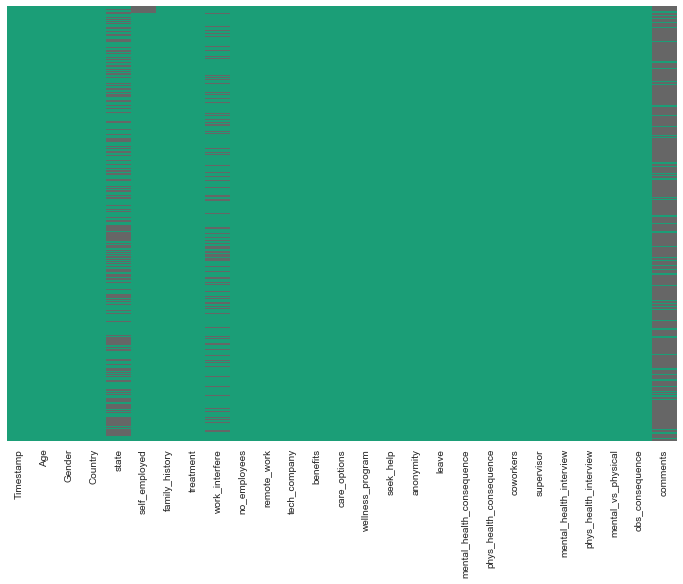

In [118]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Dark2')

In [119]:
print(data['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [120]:
Male = ['M','Male','male','m','Male-ish','maile','Cis Male','Mal','Male (CIS)','Make',
        'Guy (-ish) ^_^','Male ','Man','msle','Mail','cis male','Malr','Cis Man']

In [121]:
Female = ['Female','female','Cis Female','F','Woman','f','Femake','woman','Female ','cis-female/femme','Female (cis)','femail']

In [122]:
Neutral = ['Trans-female','something kinda male?','queer/she/they','non-binary','Nah','All','Enby','fluid','Genderqueer'
           ,'Androgyne','Agender','male leaning androgynous','Trans woman','Neuter','Female (trans)','queer','A little about you',
           'p','ostensibly male, unsure what that really means']

In [123]:
for x in range(len(data['Gender'])):
    
    if data['Gender'][x] in Male:
        data['Gender'][x] = 'Male'
    
    elif data['Gender'][x] in Female:
        data['Gender'][x] = 'Female'
    
    elif data['Gender'][x] in Neutral:
        data['Gender'][x] = 'Neutral'
    else:
        data['Gender'][x] = 'Unknown'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [124]:
data.loc[data['Gender']=="Male","Gender"] = 1
data.loc[data['Gender']=="Female","Gender"] = 2
data.loc[data['Gender']=="Neutral","Gender"] = 3
data.loc[data['Gender']=="Neutral","Gender"] = 0

In [125]:
data['Gender'].unique()

array([2, 1, 3], dtype=object)

In [126]:
dummies = pd.get_dummies(data['Gender']).rename(columns=lambda x: 'Gender_' + str(x))

In [128]:
data = pd.concat([data, dummies], axis=1)

In [129]:
data.drop(['Gender','Gender_1'], inplace=True, axis=1)

In [130]:
data

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender_2,Gender_3
0,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,No,Some of them,Yes,No,Maybe,Yes,No,NaN,1,0
1,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,No,No,No,No,No,Don't know,No,NaN,0,0
2,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,Yes,Yes,Yes,Yes,No,No,NaN,0,0
3,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,0,0
4,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0,0
5,2014-08-27 11:31:22,33,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,No,Yes,Yes,No,Maybe,Don't know,No,NaN,0,0
6,2014-08-27 11:31:50,35,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,Maybe,Some of them,No,No,No,Don't know,No,NaN,1,0
7,2014-08-27 11:32:05,39,Canada,NaN,NaN,No,No,Never,1-5,Yes,...,No,No,No,No,No,No,No,NaN,0,0
8,2014-08-27 11:32:39,42,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,No,Yes,Yes,No,Maybe,No,No,NaN,1,0
9,2014-08-27 11:32:43,23,Canada,NaN,NaN,No,No,Never,26-100,No,...,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN,0,0


In [138]:
data['treatment'].nunique()

2

In [139]:
data.family_history.replace(('yes', 'no'), (1, 0), inplace=True)
data.treatment.replace(('yes', 'no'), (1, 0), inplace=True)

In [140]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [141]:
data.loc[data['work_interfere']=="Often","work_interfere"] = 4
data.loc[data['work_interfere']=="Rarely","work_interfere"] = 3
data.loc[data['work_interfere']=="Never","work_interfere"] = 2
data.loc[data['work_interfere']=="Sometimes","work_interfere"] = 1
data.loc[data['work_interfere']=="Nan","work_interfere"] = 0

In [142]:
data['work_interfere'].unique()

array([4, 3, 2, 1, nan], dtype=object)

In [144]:
data['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'], dtype=object)

In [145]:
data.loc[data['no_employees']=="6-25","no_employees"] = 4
data.loc[data['no_employees']=="500-1000","no_employees"] = 5
data.loc[data['no_employees']=="More than 1000","no_employees"] = 3
data.loc[data['no_employees']=="26-100","no_employees"] = 2
data.loc[data['no_employees']=="100-500","no_employees"] = 1
data.loc[data['no_employees']=="1-5","no_employees"] = 0

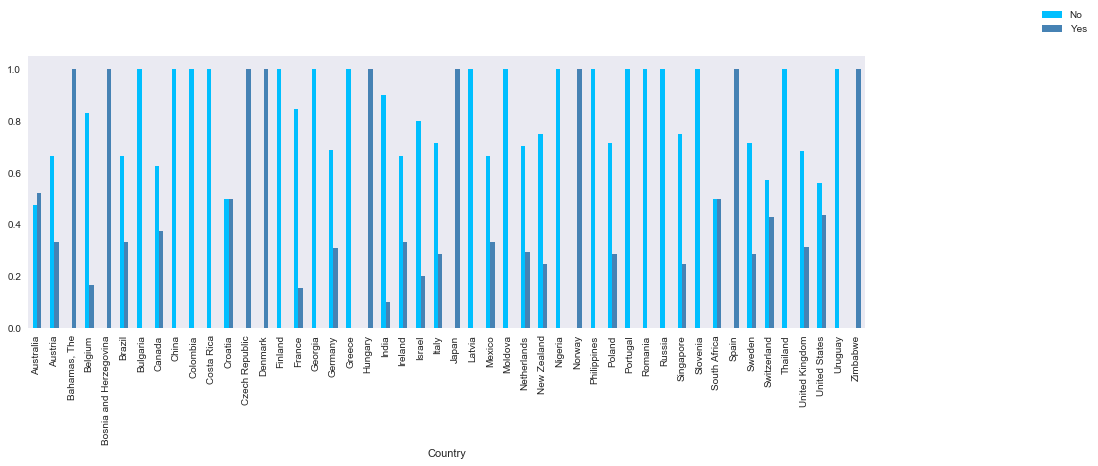

In [162]:
plt.figure(figsize=(24,8))
draw_data = pd.crosstab(data.Country, data.family_history)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.legend(loc = "upper left" ,bbox_to_anchor=(1.2, 1.2))
plt.show()